In [1]:
path = '../../Data/data/'

In [2]:
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile


## Now load the questionnaire related data from OUH and AUH 

In [3]:
#load the GN data files from AUH and OUH
with open(path + 'WP4_OUH_GN_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_GN_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 GN data loaded')

#load the Oticon data files from AUH and OUH
with open(path + 'WP4_OUH_Oticon_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_Oticon_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 Oticon data loaded')

#load the Widex data files from AUH and OUH
with open(path + 'WP4_OUH_Widex_TPI.csv') as input: 
    WP4_OUH_Widex = pd.read_csv(input)
with open(path + 'WP4_AUH_Widex_TPI.csv') as input: 
    WP4_AUH_Widex = pd.read_csv(input)
print('WP4 Widex data loaded')



WP4 GN data loaded
WP4 Oticon data loaded
WP4 Widex data loaded


## Now load the REM data files

In [4]:
path = '../../Data/REM/WP4/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/'

In [6]:
#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')
    cnt += 1
df_REM = pd.concat(REM_)

../../Data/REM/WP4/WP4-364-102 first fit.txt


NameError: name &#39;df_REM&#39; is not defined

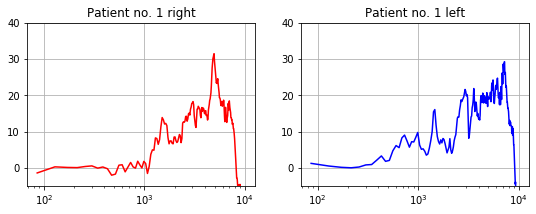

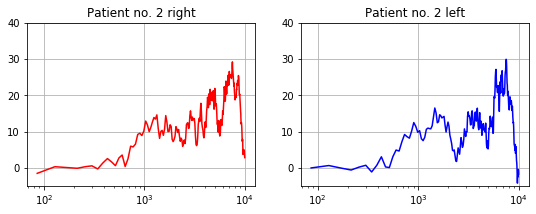

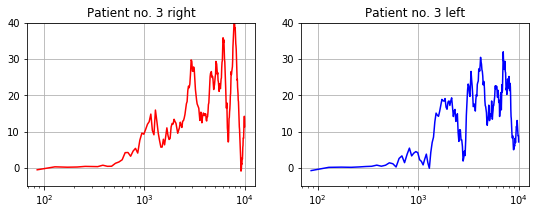

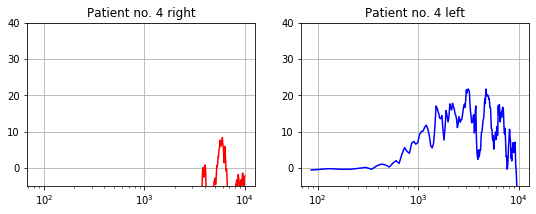

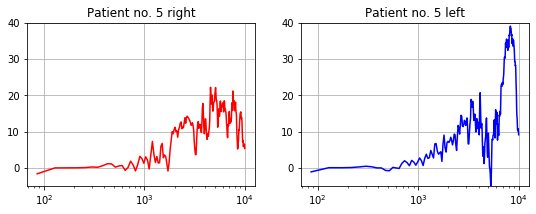

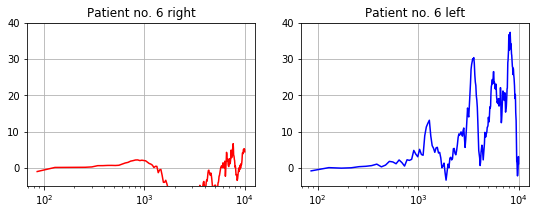

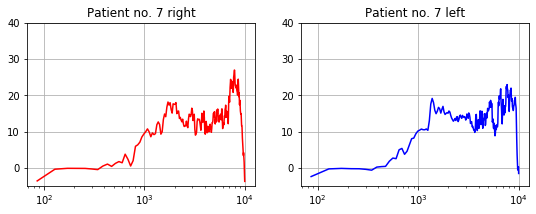

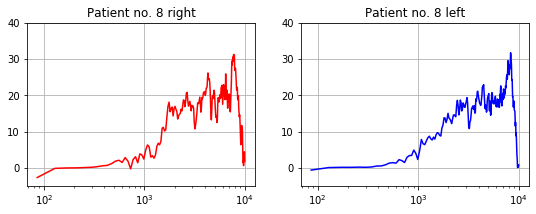

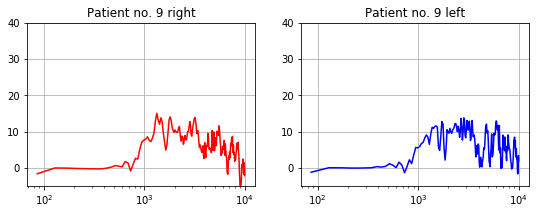

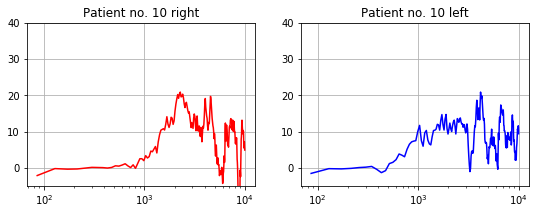

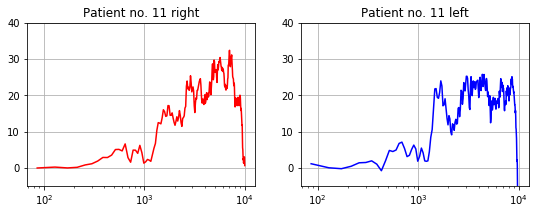

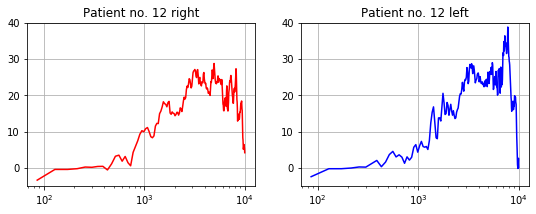

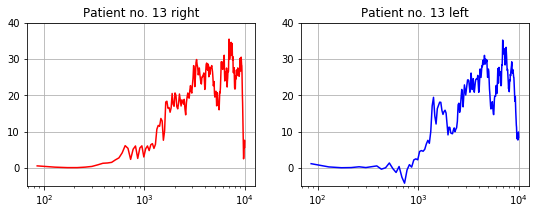

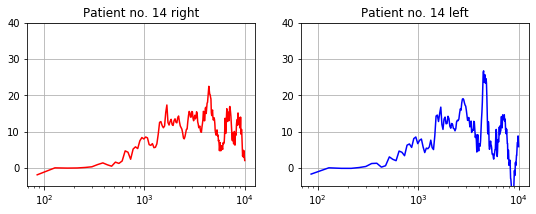

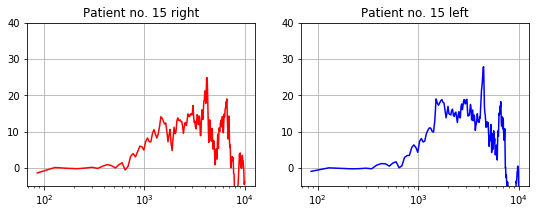

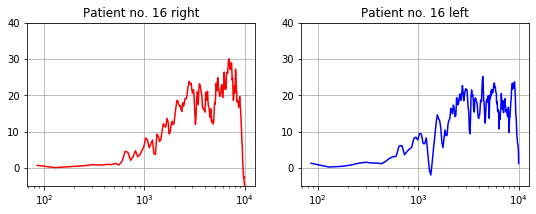

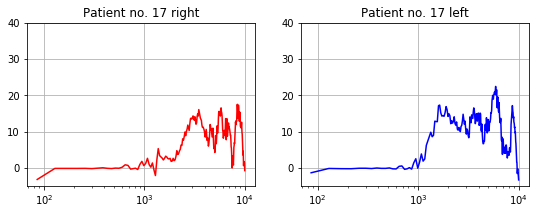

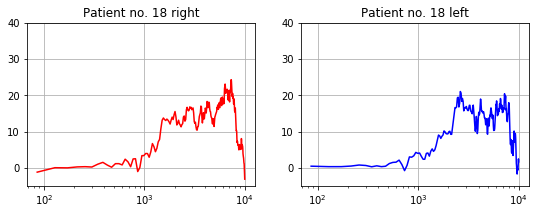

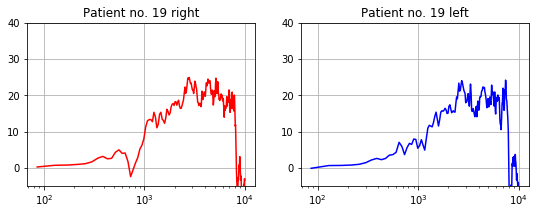

In [29]:
for patient_idx in range(len(text_files)):
    df = REM[patient_idx]

    freqs_s = list(df.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    id_right = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Right').values ))
    id_left = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Left').values ))
    
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,2)
    plt.semilogx(freqs,df.iloc[id_left,3:],'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(-5, 40)

    plt.subplot(1,2,1)
    plt.semilogx(freqs,df.iloc[id_right,3:],'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-5, 40)


## Target analysis - draft

In [8]:
def calculateBEARtarget(audiogram, profile):
    betas = dict()
    betas['A'] = np.array([[0, 0, 1, 5, 5, 3, 3],
                           [0, 0, -2, 0, 0, 0, 0],
                           [0, 0, -5, -5, -5, -5, -5]])
    betas['B'] = np.array([[-3, -3, 1, 5, 5, 7, 7],
                           [-3, -3, -2, 0, 0, 0, 0],
                           [-6, -6, -9, -9, -9, -9, -9]])
    betas['C'] = np.array([[-2, -1.3, 1, 4, 7, 7, 7],
                           [-10, -10, -5, 0, 0, 0, 0],
                           [-14, -14, -14, -14, -14, -14, -14]])
    betas['D'] = np.array([[0, 0, 0, 3, 2, 2, 2],
                           [-6, -6, -6, -3, -3, -3, -3],
                           [-10, -10, -10, -10, -14, -14, -14]])
    target = 0.31*np.array([audiogram, audiogram, audiogram]) + betas[profile]
    
    target[target < 0] = 0

    return target

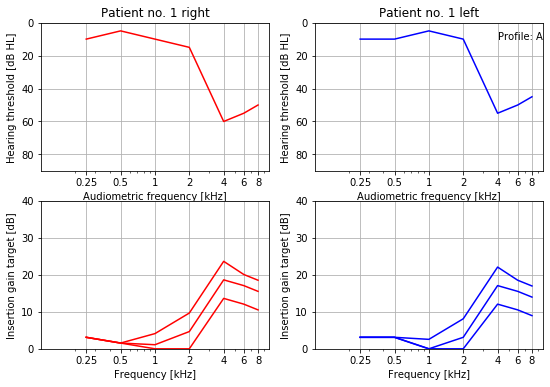

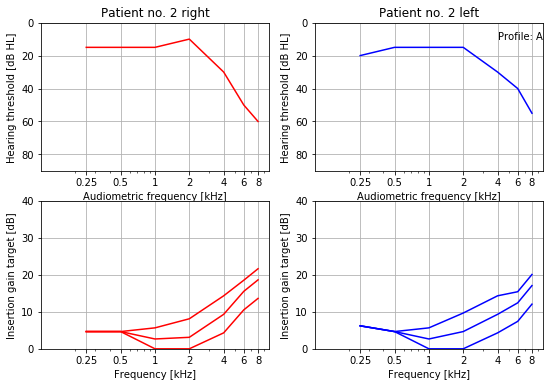

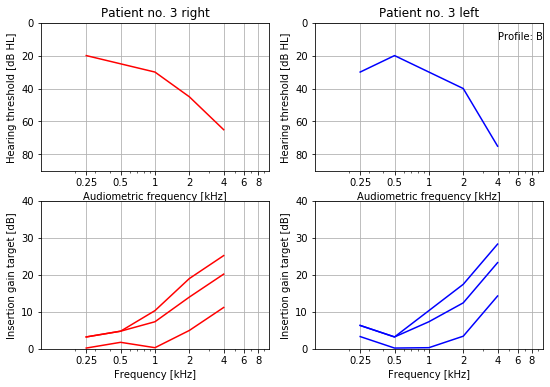

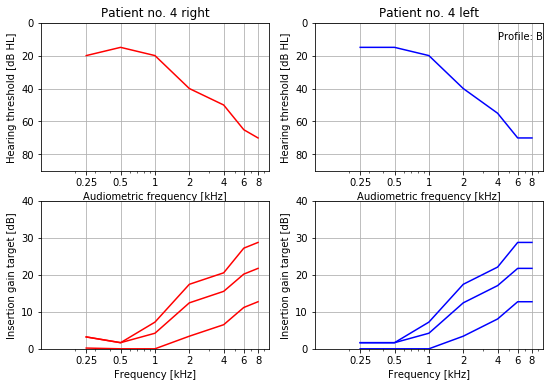

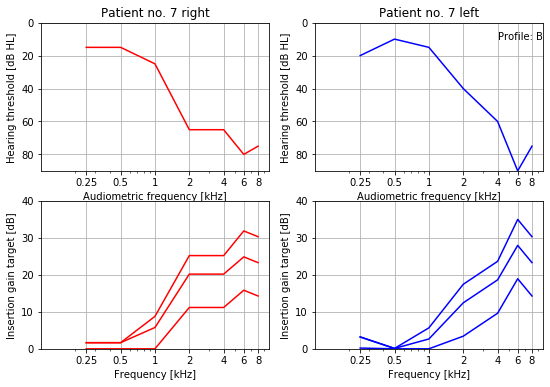

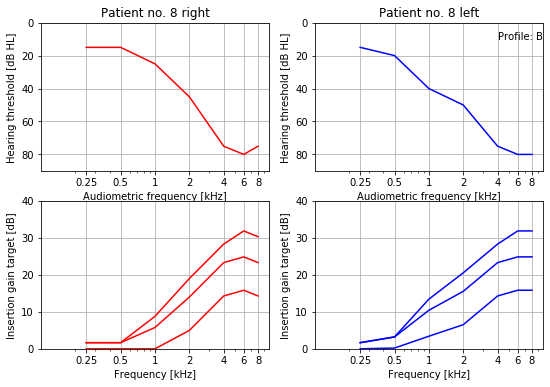

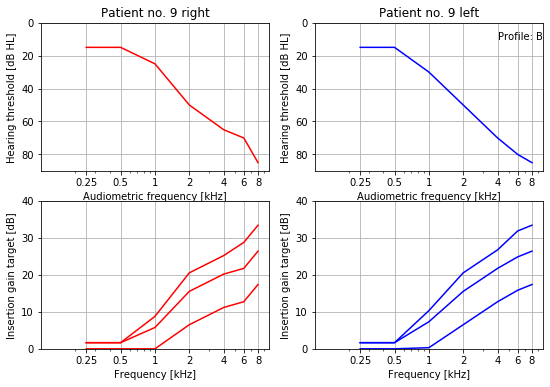

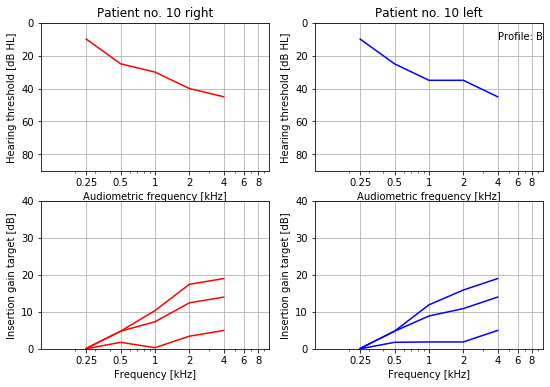

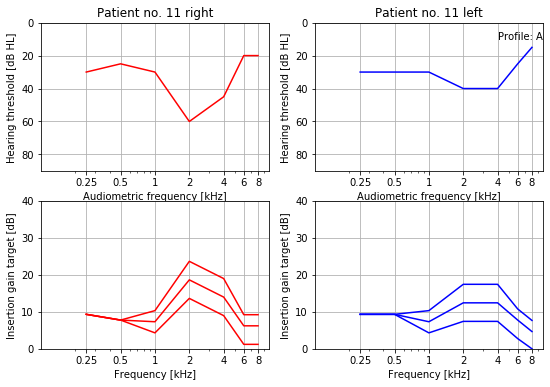

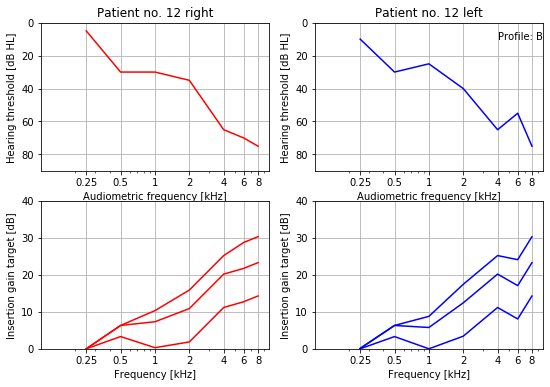

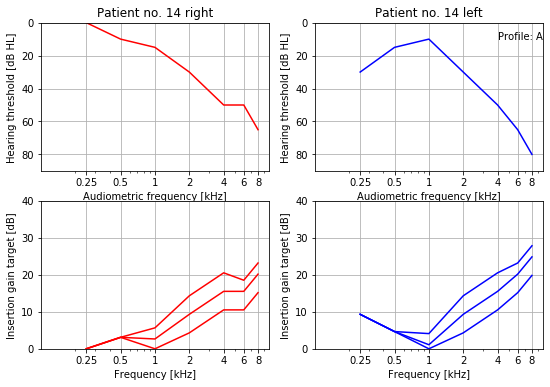

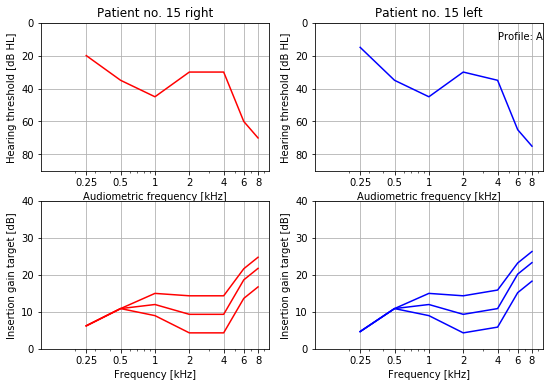

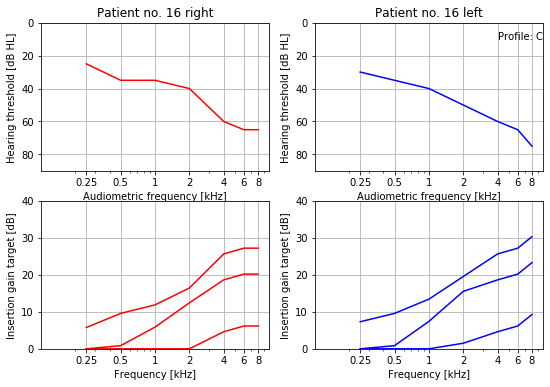

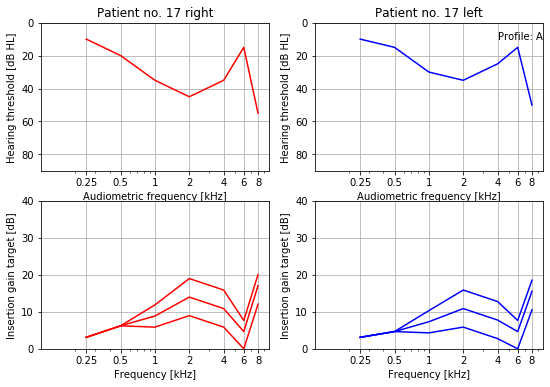

In [36]:
path = '../../Data/data/'
# df = pd.read_excel(path+'WP4_Pilots_Data_OUH_GN.xlsx')

#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
df = pd.read_excel(path+'WP4_Pilots_Data_OUH_GN.xlsx')

nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)
    
    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs_audio_no3k,target_right[0,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[1,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[2,:],'r')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs_audio_no3k,target_left[0,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[1,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[2,:],'b')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')


## Now try to smooth the REM data 

In [35]:
path = '../../Data/REM/WP4/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/'

#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    print(REM[cnt])
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    cnt += 1
df_REM = pd.concat(REM_)



#smoothing 
np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')
#now load the smoothed data again (you need to run Smoothing_REM_input.m in Matlab in order to create the file)
df_REM.reset_index(inplace=True)
REM_smooth = pd.concat((df_REM.iloc[:,0:4], pd.read_csv(path + 'Smoothed_REM_WP4.csv', names= df_REM.loc[:,'86':'9976'].columns)),axis=1).iloc[:,1:]



t  3.159008  1.460638  0.684149   
3   364-96_GN_REM_fitting   REOG 70  Right  2.350135  1.915535  0.921802   
4   364-96_GN_REM_fitting   REIG 65   Left  0.749355  0.134896  0.275759   
5   364-96_GN_REM_fitting   REIG 65  Right -0.284881 -0.004625  0.168263   
6   364-96_GN_REM_fitting   REIG 65   Left  1.245489  0.137534  0.247634   
7   364-96_GN_REM_fitting   REIG 65  Right  0.376646  0.023692  0.179613   
8   364-96_GN_REM_fitting   REIG 65   Left  1.274750  0.266153  0.492753   
9   364-96_GN_REM_fitting   REIG 65  Right  0.764173  0.101743  0.292857   
10  364-96_GN_REM_fitting   REIG 65   Left  1.349816  0.161229  0.238769   
11  364-96_GN_REM_fitting   REIG 65  Right  0.492817 -0.033741  0.101030   
12  364-96_GN_REM_fitting   REIG 65   Left  1.271525  0.197294  0.386317   
13  364-96_GN_REM_fitting   REIG 65  Right  0.516720  0.080046  0.260892   
14  364-96_GN_REM_fitting   REIG 65   Left  1.216499  0.166502  0.332063   
15  364-96_GN_REM_fitting   REIG 65  Right  0.550939 

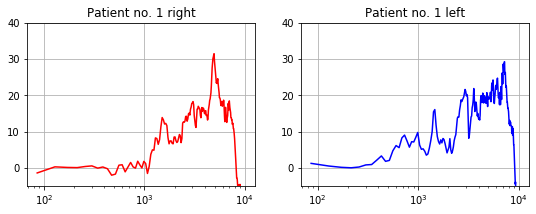

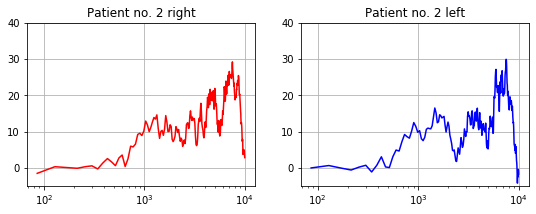

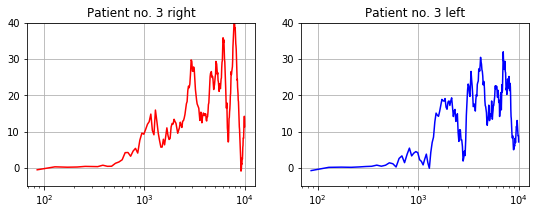

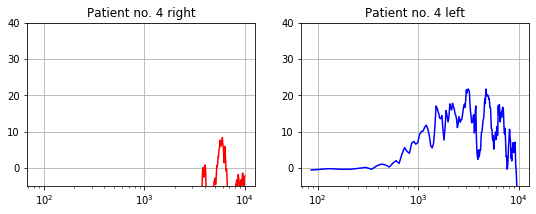

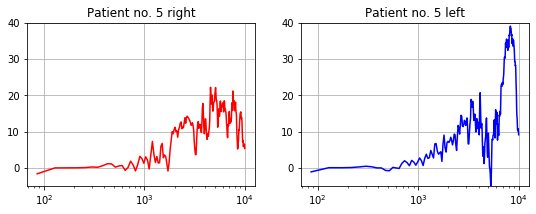

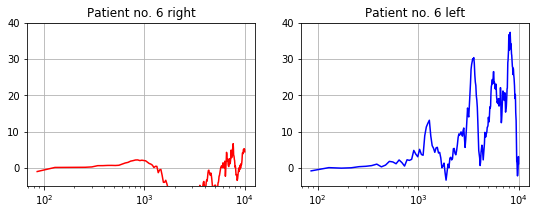

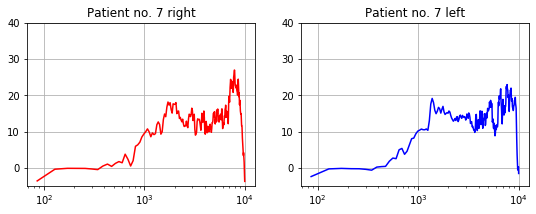

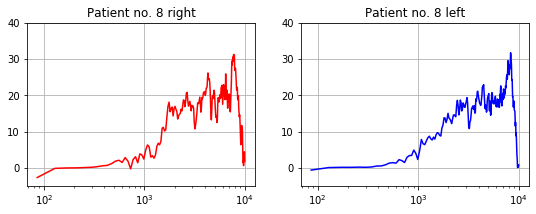

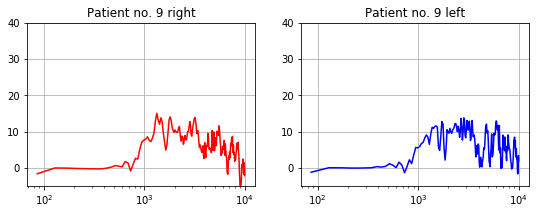

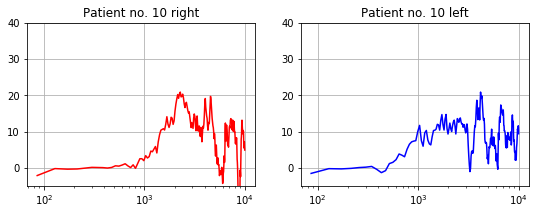

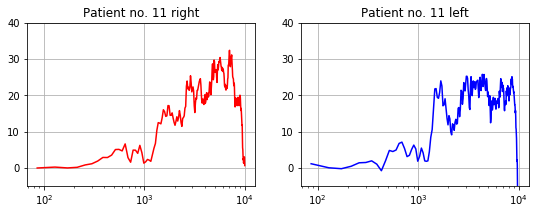

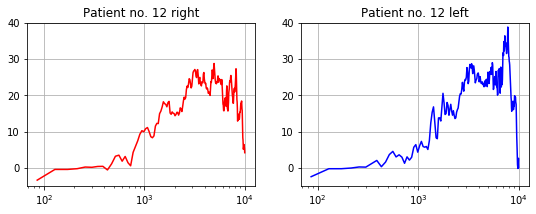

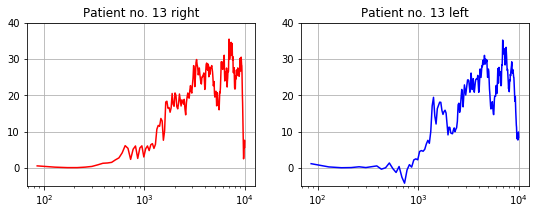

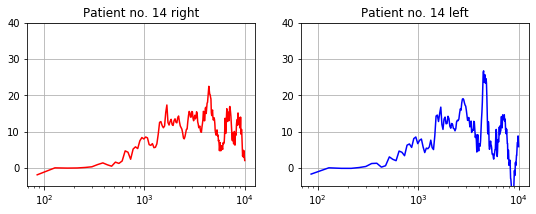

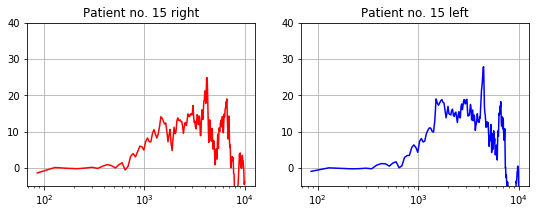

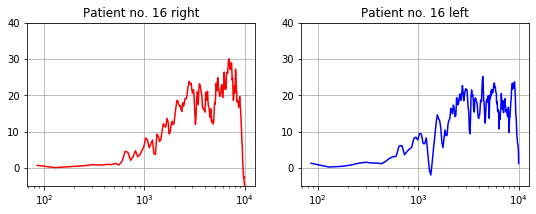

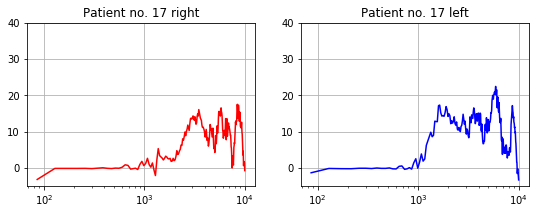

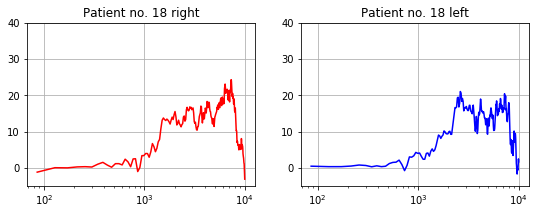

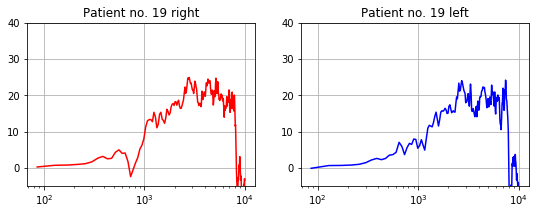

In [33]:
for patient_idx in range(len(text_files)):
    df = REM[patient_idx]

    freqs_s = list(df.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    id_right = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Right').values ))
    id_left = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Left').values ))
    
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,2)
    plt.semilogx(freqs,df.iloc[id_left,3:],'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(-5, 40)

    plt.subplot(1,2,1)
    plt.semilogx(freqs,df.iloc[id_right,3:],'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-5, 40)


## Try to plot both smoothed insertion gain and targets

In [26]:
REM_smooth

RC_ID      Test    Ear       86      129      172  \
0    364-102_GN_REM_fitting   REUG 70   Left  1.38110  1.21520  0.53155   
1    364-102_GN_REM_fitting   REUG 70  Right -0.75969 -0.51844 -0.20129   
2    364-102_GN_REM_fitting   REOG 70   Left  1.81420  1.66060  0.97968   
3    364-102_GN_REM_fitting   REOG 70  Right -0.39829 -0.13194  0.23296   
4    364-102_GN_REM_fitting   REIG 65   Left  0.32855  0.25363  0.14896   
..                      ...       ...    ...      ...      ...      ...   
593  WP4-365-0039 first fit   REIG 55   Left -0.64721 -0.20738  0.76310   
594  WP4-365-0039 first fit   REIG 80  Right  0.85435  0.92541  1.16400   
595  WP4-365-0039 first fit   REIG 80   Left  0.88644  0.87903  0.90836   
596  WP4-365-0039 first fit  LTASS 65  Right  1.39350  1.46600  1.36390   
597  WP4-365-0039 first fit  LTASS 65   Left  0.57974  0.85115  0.97955   

         215      258      301      344  ...     9589     9632     9675  \
0    0.34786  0.02569 -0.19486 -0.62946  ...   1.0579   1.2441   1.4003   
1   -0.29751 -0.41651 -0.51911 -1.02900  ...   2.0811   2.2767   2.4842   
2    0.84158  0.67105  0.64097  0.78580  ...  -5.9322  -5.9081  -5.8839   
3    0.17280  0.10226  0.03059 -0.74711  ...  -3.2335  -3.2308  -3.2026   
4    0.23033  0.21501  0.59602  1.30660  ...   6.6431   6.2356   5.8378   
..       ...      ...      ...      ...  ...      ...      ...      ...   
593  0.86784  1.21070  1.67950  2.20580  ...   2.0050   1.6902   1.3684   
594  1.30530  1.62180  1.97900  2.26350  ...  10.4080  10.2950  10.1670   
595  1.02090  1.22120  1.47580  1.85920  ...   5.7453   5.5307   5.3052   
596  1.29410  1.44110  1.80930  2.20480  ...   7.7602   7.4921   7.2335   
597  0.89103  0.96715  1.19430  1.69010  ...   8.2674   8.0652   7.8651   

       9718     9761     9804    9847     9890      9933      9976  
0    1.5557  1.71520  1.71520  1.8586  1.99030  2.128700  2.279700  
1    2.7026  2.91800  2.91800  3.1435  3.38020  3.614600  3.848200  
2   -5.8428 -5.82130 -5.82130 -5.8282 -5.84420 -5.869600 -5.898800  
3   -3.1613 -3.12740 -3.12740 -3.0818 -3.03090 -2.986800 -2.938500  
4    5.4511  5.05660  5.05660  4.6947  4.34250  3.961500  3.574400  
..      ...      ...      ...     ...      ...       ...       ...  
593  1.0826  0.81555  0.81555  0.5510  0.29094  0.089236 -0.066819  
594  9.9947  9.80340  9.80340  9.6008  9.40630  9.233100  8.987800  
595  5.0765  4.86160  4.86160  4.6737  4.53650  4.472900  4.426400  
596  6.9861  6.73260  6.73260  6.4850  6.24080  6.013100  5.758400  
597  7.6824  7.49500  7.49500  7.2911  7.10500  6.973500  6.847400  

[598 rows x 234 columns]

364-84


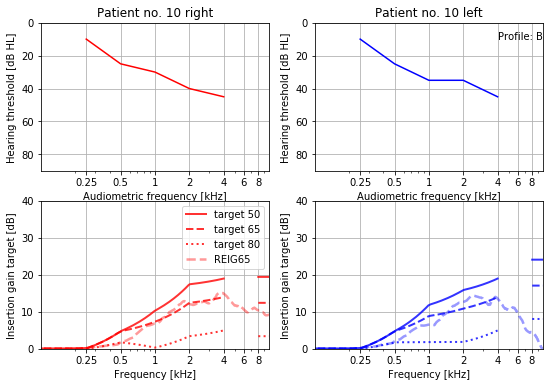

In [34]:
#path for other data 
path = '../../Data/data/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
#df = pd.read_excel(path + '')
df = pd.read_excel(path+ 'WP4_Pilots_Data_OUH_GN.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)


    #now get the corresponding REM     
    df_ = REM_smooth[REM_smooth['RC_ID'].str.contains(df.iloc[patient_idx,0])]

    if(df_.empty):
        continue

    freqs_s = list(df_.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]
    
    # Find all REIG 65 for a given patient
    all_id_right = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Right').values )
    all_id_left  = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Left').values )
    
    # Choose the max (or other value) of all the id_right and left
    id_right = np.max(all_id_right)
    id_left  = np.max(all_id_left)
        

    #interpolate the frequencies and values of the audiogram 
    target_left_ = []
    target_right_ = []
    for idx in range(3):
        target_left_.append(np.interp(freqs, freqs_audio_no3k, target_left[idx,:].astype('float64')))
        target_right_.append(np.interp(freqs, freqs_audio_no3k, target_right[idx,:].astype('float64')))

    target_left__ = np.array(target_left_)
    target_right__ = np.array(target_right_)
    

    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs,target_right__[0,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'solid',label='target 50')
    plt.semilogx(freqs,target_right__[1,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dashed',label='target 65')
    plt.semilogx(freqs,target_right__[2,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dotted',label='target 80')
    #REM 2 REIG65dB
    plt.semilogx(freqs,df_.iloc[id_right,3:],'r',linewidth=2.5,alpha=0.4,linestyle='dashed',label='REIG65')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    plt.legend()
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs,target_left__[0,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'solid')
    plt.semilogx(freqs,target_left__[1,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dashed')
    plt.semilogx(freqs,target_left__[2,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dotted')
    #REM @ REIG65dB
    plt.semilogx(freqs,df_.iloc[id_left,3:],'b',linewidth=2.5,alpha=0.4,linestyle='dashed')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    print(df.iloc[patient_idx,0][4:])
    
   
        
    
    